In [16]:
import numpy as np
import pandas as pd
import plotly 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [17]:
# loads csv file of energy generation from my github
# skips first row of non values
# removes commas from numbers 

gen0 = pd.read_csv('https://github.com/SeanAntosiak/LS-DS6-Unit-1-Project-Files/blob/master/datasets/annual_generation_state.csv?raw=true', skiprows=1, thousands=',')

In [18]:
# takes only the rows corosponding to state total generation
# removes the type of producer column since it's all the same (state total) 
# renames columns and converts values to int in Mwh column

gen0 = gen0[gen0['TYPE OF PRODUCER']=='Total Electric Power Industry']
gen = gen0.drop(columns=['TYPE OF PRODUCER'])
gen.rename(columns={'ENERGY SOURCE': 'SOURCE', 'GENERATION (Megawatthours)': 'Mwh'}, inplace=True)
gen['Mwh']=gen['Mwh'].apply(int)

In [19]:
# Checks all values in STATE column of the generation dataframe

gen['STATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US-TOTAL', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', '  ',
       'US-Total'], dtype=object)

In [20]:
# changes both instances of 'US total' to have the same name
# checks that the rename worked

gen['STATE'].replace({'US-Total': 'US', 'US-TOTAL': 'US'}, inplace=True)

gen['STATE'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', '  '], dtype=object)

In [21]:
# Checks all energy sources in the original dataset

gen['SOURCE'].unique()

array(['Total', 'Coal', 'Hydroelectric Conventional', 'Natural Gas',
       'Petroleum', 'Wind', 'Wood and Wood Derived Fuels', 'Nuclear',
       'Other Biomass', 'Other Gases', 'Pumped Storage', 'Geothermal',
       'Other', 'Solar Thermal and Photovoltaic'], dtype=object)

In [22]:
# creates dataframes for energy sources of interest
# reset indexs (optional)
# these will be used to create choropleth maps

genTotal = gen[gen['SOURCE']=='Total'].reset_index(drop=True)
genCoal = gen[gen['SOURCE']=='Coal'].reset_index(drop=True)
genNat = gen[gen['SOURCE']=='Natural Gas'].reset_index(drop=True)
genPet = gen[gen['SOURCE']=='Petroleum'].reset_index(drop=True)
genNuc = gen[gen['SOURCE']=='Nuclear'].reset_index(drop=True)
genHyd = gen[gen['SOURCE']=='Hydroelectric Conventional'].reset_index(drop=True)
genWind = gen[gen['SOURCE']=='Wind'].reset_index(drop=True)
genSol = gen[gen['SOURCE']=='Solar Thermal and Photovoltaic'].reset_index(drop=True)

In [23]:
# creates dataframes for United States overall energy generation by source 
# reset indexs, NEEDED in order to calculate percentages later
# these will be used to create arrays for line plots

genTotalUS = genTotal[genTotal['STATE']=='US'].reset_index(drop=True)
genCoalUS = genCoal[genCoal['STATE']=='US'].reset_index(drop=True)
genNatUS = genNat[genNat['STATE']=='US'].reset_index(drop=True)
genPetUS = genPet[genPet['STATE']=='US'].reset_index(drop=True)
genNucUS = genNuc[genNuc['STATE']=='US'].reset_index(drop=True)
genHydUS = genHyd[genHyd['STATE']=='US'].reset_index(drop=True)
genWindUS = genWind[genWind['STATE']=='US'].reset_index(drop=True)
genSolUS = genSol[genSol['STATE']=='US'].reset_index(drop=True)

In [24]:
# creates arrays to use for making line plots of United States energy generation
# we only need one x value because the years are the same for every energy source
# values converted to percent by diving by total then multiplied by 100

genTotalUSx = genTotalUS['YEAR']

genCoalUSy = (genCoalUS['Mwh']/(genTotalUS['Mwh']))*100
genNatUSy = (genNatUS['Mwh']/(genTotalUS['Mwh']))*100
genPetUSy = (genPetUS['Mwh']/(genTotalUS['Mwh']))*100
genNucUSy = (genNucUS['Mwh']/(genTotalUS['Mwh']))*100
genHydUSy = (genHydUS['Mwh']/(genTotalUS['Mwh']))*100
genWindUSy = (genWindUS['Mwh']/(genTotalUS['Mwh']))*100
genSolUSy = (genSolUS['Mwh']/(genTotalUS['Mwh']))*100

In [25]:
# creates dataframes for California energy generation by source 
# reset indexs, NEEDED in order to calculate percentages later
# these will be used to create arrays for line plots

genTotalCA = genTotal[genTotal['STATE']=='CA'].reset_index(drop=True)
genCoalCA = genCoal[genCoal['STATE']=='CA'].reset_index(drop=True)
genNatCA = genNat[genNat['STATE']=='CA'].reset_index(drop=True)
genPetCA = genPet[genPet['STATE']=='CA'].reset_index(drop=True)
genNucCA = genNuc[genNuc['STATE']=='CA'].reset_index(drop=True)
genHydCA = genHyd[genHyd['STATE']=='CA'].reset_index(drop=True)
genWindCA = genWind[genWind['STATE']=='CA'].reset_index(drop=True)
genSolCA = genSol[genSol['STATE']=='CA'].reset_index(drop=True)

In [26]:
# creates arrays to use for making lineplots of California energy generation
# we only need one x value because the years are the same for every energy source
# values converted to percent by diving by total then multiplied by 100

genTotalCAx = genTotalCA['YEAR']

genCoalCAy = (genCoalCA['Mwh']/(genTotalCA['Mwh']))*100
genNatCAy = (genNatCA['Mwh']/(genTotalCA['Mwh']))*100
genPetCAy = (genPetCA['Mwh']/(genTotalCA['Mwh']))*100
genNucCAy = (genNucCA['Mwh']/(genTotalCA['Mwh']))*100
genHydCAy = (genHydCA['Mwh']/(genTotalCA['Mwh']))*100
genWindCAy = (genWindCA['Mwh']/(genTotalCA['Mwh']))*100
genSolCAy = (genSolCA['Mwh']/(genTotalCA['Mwh']))*100

That's all the data, now to visualize it

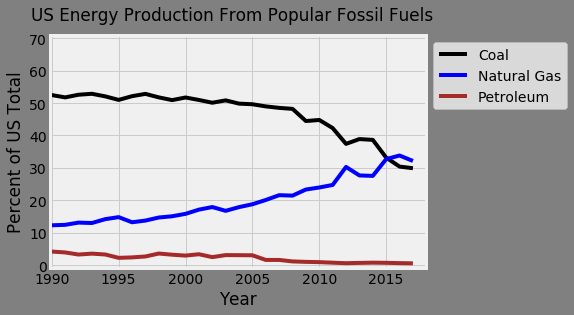

In [13]:
fig = plt.figure()
ax = plt.axes()
plt.grid(True)
plt.ylim(-1,71)
plt.xlim(1989.9,2018)
fig.patch.set_facecolor('grey')
plt.style.use('fivethirtyeight')

ax.set_xlabel('Year')
ax.set_ylabel('Percent of US Total')
fig.suptitle('US Energy Production From Popular Fossil Fuels')

ax.plot(genTotalUSx, genCoalUSy, label='Coal', color='black')
ax.plot(genTotalUSx, genNatUSy, label='Natural Gas', color='blue')
ax.plot(genTotalUSx, genPetUSy, label='Petroleum', color='brown')

ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('fossilUS.png', bbox_inches='tight', dpi=300)
plt.show()


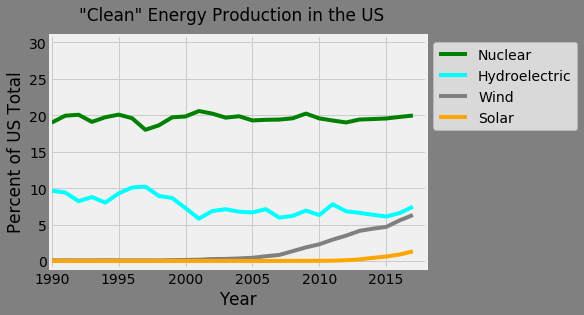

In [14]:
fig = plt.figure()
ax = plt.axes()
plt.grid(True)
plt.ylim(-1,31)
plt.xlim(1989.9,2018)
fig.patch.set_facecolor('grey')
plt.style.use('fivethirtyeight')

ax.set_xlabel('Year')
ax.set_ylabel('Percent of US Total')
fig.suptitle('\"Clean\" Energy Production in the US')

ax.plot(genTotalUSx, genNucUSy, label='Nuclear', color='Green')
ax.plot(genTotalUSx, genHydUSy, label='Hydroelectric', color='Cyan')
ax.plot(genTotalUSx, genWindUSy, label='Wind', color='Grey')
ax.plot(genTotalUSx, genSolUSy, label='Solar', color='Orange')

ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('cleanUS.png', bbox_inches='tight', dpi=300)
plt.show()


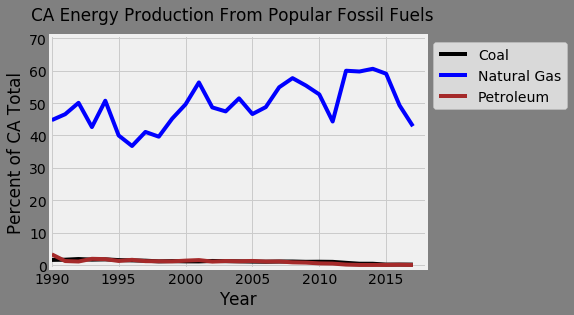

In [15]:
fig = plt.figure()
ax = plt.axes()
plt.grid(True)
plt.ylim(-1,71)
plt.xlim(1989.9,2018)
fig.patch.set_facecolor('grey')
plt.style.use('fivethirtyeight')

ax.set_xlabel('Year')
ax.set_ylabel('Percent of CA Total')
fig.suptitle('CA Energy Production From Popular Fossil Fuels')

ax.plot(genTotalCAx, genCoalCAy, label='Coal', color='black')
ax.plot(genTotalCAx, genNatCAy, label='Natural Gas', color='blue')
ax.plot(genTotalCAx, genPetCAy, label='Petroleum', color='brown')

ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('fossilCA.png', bbox_inches='tight', dpi=300)
plt.show()

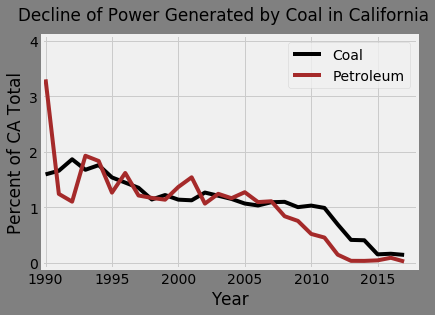

In [27]:
fig = plt.figure()
ax = plt.axes()
plt.grid(True)
plt.ylim(-.1,4.1)
plt.xlim(1989.7,2018)
fig.patch.set_facecolor('grey')
plt.style.use('fivethirtyeight')

ax.set_xlabel('Year')
ax.set_ylabel('Percent of CA Total')
fig.suptitle('Decline of Power Generated by Coal in California')

ax.plot(genTotalCAx, genCoalCAy, label='Coal', color='black')
ax.plot(genTotalCAx, genPetCAy, label='Petroleum', color='brown')

ax.legend()
plt.savefig('coalCA.png', bbox_inches='tight', dpi=300)
plt.show()

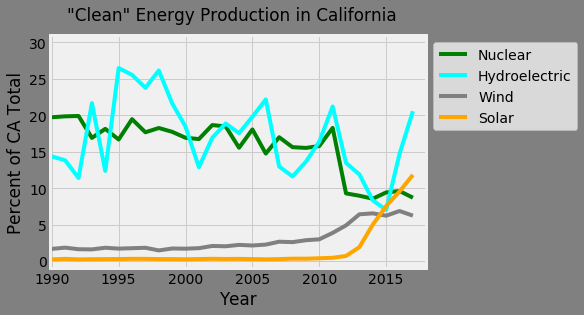

In [16]:
fig = plt.figure()
ax = plt.axes()
plt.grid(True)
plt.ylim(-1,31)
plt.xlim(1989.9,2018)
fig.patch.set_facecolor('grey')
plt.style.use('fivethirtyeight')

ax.set_xlabel('Year')
ax.set_ylabel('Percent of CA Total')
fig.suptitle('\"Clean\" Energy Production in California')

ax.plot(genTotalCAx, genNucCAy, label='Nuclear', color='Green')
ax.plot(genTotalCAx, genHydCAy, label='Hydroelectric', color='Cyan')
ax.plot(genTotalCAx, genWindCAy, label='Wind', color='Grey')
ax.plot(genTotalCAx, genSolCAy, label='Solar', color='Orange')

ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('cleanCA.png', bbox_inches='tight', dpi=300)
plt.show()


In [17]:
# creates choropleth map of total US energy generation

sliderGenTotal = []
for year in genTotal['YEAR'].unique():
    genYearX = genTotal[genTotal['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='cividis',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=300000000
    )
    sliderGenTotal.append(yearPlot);

stepsGenTotal=[]
for i in range(len(sliderGenTotal)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenTotal)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenTotal.append(step)
    
slidersGenTotal = [dict(steps=stepsGenTotal)]

layoutGenTotal = dict(title = 'Total Energy Generated by Each State for Every Year Since 1990' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenTotal
             )

figGenTotal=dict(data=sliderGenTotal, layout=layoutGenTotal)

# uncomment to show map
# plotly.offline.iplot(figGenTotal) 

In [18]:
# creates choropleth map of US energy generated from coal

sliderGenCoal = []
for year in genCoal['YEAR'].unique():
    genYearX = genCoal[genCoal['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='greys',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=100000000
    )
    sliderGenCoal.append(yearPlot);

stepsGenCoal=[]
for i in range(len(sliderGenCoal)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenCoal)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenCoal.append(step)
    
slidersGenCoal = [dict(steps=stepsGenCoal)]

layoutGenCoal = dict(title = 'Energy Generated by Burning Coal in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenCoal
             )

figGenCoal=dict(data=sliderGenCoal, layout=layoutGenCoal)

# uncomment to show map
# plotly.offline.iplot(figGenCoal)

In [19]:
# creates choropleth map of US energy generated from Natural Gas

sliderGenNat = []
for year in genNat['YEAR'].unique():
    genYearX = genNat[genNat['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='blues',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=150000000
    )
    sliderGenNat.append(yearPlot);

stepsGenNat=[]
for i in range(len(sliderGenNat)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenNat)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenNat.append(step)
    
slidersGenNat = [dict(steps=stepsGenNat)]

layoutGenNat = dict(title = 'Energy Generated by Burning Natural Gas in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenNat
             )

figGenNat=dict(data=sliderGenNat, layout=layoutGenNat)

# uncomment below to show map
# plotly.offline.iplot(figGenNat)

In [20]:
# creates choropleth map of US energy generated from petroleum

sliderGenPet = []
for year in genPet['YEAR'].unique():
    genYearX = genPet[genPet['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='earth',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=1000000
    )
    sliderGenPet.append(yearPlot);

stepsGenPet=[]
for i in range(len(sliderGenPet)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenPet)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenPet.append(step)
    
slidersGenPet = [dict(steps=stepsGenPet)]

layoutGenPet = dict(title = 'Energy Generated by Burning Petroleum for Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenPet
             )

figGenPet=dict(data=sliderGenPet, layout=layoutGenPet)

# uncomment below to show map
# plotly.offline.iplot(figGenPet)

In [21]:
# creates choropleth map of US nuclear energy generation 

sliderGenNuc = []
for year in genNuc['YEAR'].unique():
    genYearX = genNuc[genNuc['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='speed',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=50000000
    )
    sliderGenNuc.append(yearPlot);

stepsGenNuc=[]
for i in range(len(sliderGenNuc)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenNuc)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenNuc.append(step)
    
slidersGenNuc = [dict(steps=stepsGenNuc)]

layoutGenNuc = dict(title = 'Nuclear Power Generated in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenNuc
             )

figGenNuc=dict(data=sliderGenNuc, layout=layoutGenNuc)

# uncomment below to show map
# plotly.offline.iplot(figGenNuc)

In [22]:
# creates choropleth map of US hydroelectric energy generation

sliderGenHyd = []
for year in genHyd['YEAR'].unique():
    genYearX = genHyd[genHyd['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='darkmint',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=50000000
    )
    sliderGenHyd.append(yearPlot);

stepsGenHyd=[]
for i in range(len(sliderGenHyd)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenHyd)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenHyd.append(step)
    
slidersGenHyd = [dict(steps=stepsGenHyd)]

layoutGenHyd = dict(title = 'Hydro-Electric Power Generated in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenHyd
             )

figGenHyd=dict(data=sliderGenHyd, layout=layoutGenHyd)

# uncomment to show map
# plotly.offline.iplot(figGenHyd)

In [23]:
# creates choropleth map of US energy generated from wind

sliderGenWind = []
for year in genWind['YEAR'].unique():
    genYearX = genWind[genWind['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='mint',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=50000000
    )
    sliderGenWind.append(yearPlot);

stepsGenWind=[]
for i in range(len(sliderGenWind)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenWind)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenWind.append(step)
    
slidersGenWind = [dict(steps=stepsGenWind)]

layoutGenWind = dict(title = 'Power Generated by Wind in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenWind
             )

figGenWind=dict(data=sliderGenWind, layout=layoutGenWind)

# uncomment below to show map
# plotly.offline.iplot(figGenWind)

In [24]:
# creates choropleth map for US solar energy generation  

sliderGenSol = []
for year in genSol['YEAR'].unique():
    genYearX = genSol[genSol['YEAR']==year]
    yearPlot = dict(
        type='choropleth',
        locations = genYearX['STATE'],
        z = genYearX['Mwh'],
        locationmode='USA-states',
        colorscale='Solar',
        colorbar= {'title':'Mwh'},
        zmin=0,
        zmax=25000000
    )
    sliderGenSol.append(yearPlot);

stepsGenSol=[]
for i in range(len(sliderGenSol)):
    step = dict(method='restyle',
                args=['visible', [False] * len(sliderGenSol)],
                label='Year '+ str(i + 1990))
    step['args'][1][i] = True
    stepsGenSol.append(step)
    
slidersGenSol = [dict(steps=stepsGenSol)]

layoutGenSol = dict(title = 'Solar Power Generated in Each State' 
                                  '<br>( hover over a state to view numeric values )', 
             geo = dict(scope='usa'),
             sliders=slidersGenSol
             )

figGenSol=dict(data=sliderGenSol, layout=layoutGenSol)

# uncomment below to show map
# plotly.offline.iplot(figGenSol)

In [25]:
# creates html files for each choropleth map for use on github/blog

plotly.offline.plot(figGenTotal, filename = 'genTotal.html', auto_open=False)
plotly.offline.plot(figGenCoal, filename = 'genCoal.html', auto_open=False)
plotly.offline.plot(figGenNat, filename = 'genNat.html', auto_open=False)
plotly.offline.plot(figGenPet, filename = 'genPet.html', auto_open=False)
plotly.offline.plot(figGenNuc, filename = 'genNuc.html', auto_open=False)
plotly.offline.plot(figGenHyd, filename = 'genHyd.html', auto_open=False)
plotly.offline.plot(figGenWind, filename = 'genWind.html', auto_open=False)
plotly.offline.plot(figGenSol, filename = 'genSol.html', auto_open=False)


'genSol.html'